# __Calcul des forces de pression sur une digue__ - Ben Lichtfeld SPRINTB

## __Introduction__
Une digue est une structure permettant de retenir une masse d'eau afin de protéger des infrastructures ou des zones inondables. L'objectif de ce projet est de modéliser numériquement les forces exercées sur une digue de forme arbitraire et de déterminer si elle est en équilibre translationnel. Nous appliquerons cette modélisation à l'interface entre l'eau et le béton pour une pente droite puis pour une forme convexe.

## __1. Éléments théoriques__  
Nous considérons une digue en béton (masse volumique $\rho_{béton}$ = 3000 kg/m³) posée sur un sol rocheux (coefficient de frottement statique $\mu$ = 0.5). La digue retient une masse d'eau de hauteur $H$ = 10 m. D'un côté la digue retient la masse d'eau, l'autre côté étant exposé à l'air.

__Bilan des forces__  
Afin d'étudier l'équilibre de la digue, nous devons tout d'abord effectuer le bilan des forces exercées sur celle-ci.  
Les forces suivantes sont appliquées à la digue :
- Le poids $\vec{P}$ : il s'applique au centre de gravité de la digue et est dirigé verticalement vers le bas. Il est donné par $P = \rho_{béton} V g$ avec $\rho_{béton} = 3000$ kg/m$^3$, $V$ le volume de la digue, et $g=9.81$ m/s$^2$ l'intensité de pesanteur terrestre.
- La force de pression de l'eau $\vec{F_P}$, dirigée vers l'intérieur de la digue, orthogonale à la surface.
- La réaction normale $\vec{N}$ au sol, dirigée vers le haut.
- La réaction tangentielle $\vec{T}$ au sol (force de frottements) dirigée vers la droite, qui permet à la digue de ne pas glisser.

__Équilibre translationnel__
Afin que la digue ne glisse pas, la condition d'équilibre translationnel doit être établit.  
$$\sum_i \vec{F}_i = \vec{0} \Leftrightarrow \vec{P} + \vec{R} + \vec{F_P} = \vec{0} $$ où $\vec{R} = \vec{N} + \vec{T}$  
Nous étudierons cette condition pour deux cas possible : lorsque l'interface entre le béton et l'eau est droite, puis lorsqu'elle est courbée (convexe).  
On notera $P_{eau}(x)= \rho g (H-x)$ l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.  
Nous calculerons numériquement ces différentes forces pour étudier l'équilibre translationnel de la digue.

## __2. Hypothèses__
Pour simplifier l'étude, nous faisons les hypothèses suivantes :

- La digue est modélisée en __deux dimensions__.
- La __pression de l'air__ est __négligée__.
- L'eau est supposée __incompressible__ et __statique__ (pas d'écoulement).
- La __masse volumique du béton__ est __constante__ (béton homogène).
- La __surface de la digue__ est modélisée par des __fonctions mathématiques monotones__.

## __3. Méthode et modélisation__

__Objectif__  
Le but est d'obtenir les valeurs numériques de la réaction normale et la réaction tangentielle au sol, d'établir leur rapport $T/N$ et de le comparer au coefficient de frottement $\mu$. En effet, la condition d'équilibre statique impose : $$T\le N\mu \Leftrightarrow \frac{T}{N}\le \mu$$ Si le rapport $T/N$ est plus petit ou égal à $\mu$, alors la digue est en équilibre translationnel. Sinon, elle ne l'est pas. Pour trouver les expressions de T et N, nous utilisons la condition d'équilibre translationnel établie dans la première partie, qu'on projette sur les axe x et y. Nous pourrons ainsi les exprimer en fonction de la projection du poids et de la projection des forces de pressions appliquées au système. Nous calculerons ces projections à l'aide d'intégrations numériques.

__Modélisation__  
Pour modéliser une digue de forme arbitraire, nous décrivons les pentes côté air et côté eau à l’aide de fonctions mathématiques exprimant x en fonction de y. Cela nous permet de faciliter l’intégration des forces dans la direction verticale.  
On définit donc :

- une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
- une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 


Nous nous limitons ici à des fonctions monotones.

Dans le cas où la digue suit une pente linéaire du côté air, la fonction est donnée par : $$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$  
L'interface entre l'eau et le béton sera différent dans les deux cas que nous allons étudier. 

### __3.1 Cas des digues en pentes droites__  
Nous considérons d'abord l'interface entre le béton et l'eau comme droite, représentée par la fonction $$
f_{air}(y) = -\frac{x_e}{H}.(y-H)
$$  

Nous importons d'abord les bibliothèques nécéssaires à notre étude.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constantes du pb
a = 3
H = 10 #hauteur digue en m
xa = -5  #côté air m
xe = 5 #côté eau m
L = 1  #longueur de la digue m
g = 9.81 #(m/s^2)
rho_eau=1000 #kg/m^3
n = 1000 #discrétisation pour toutes les intégrales

Nous traçons la forme de la digue à l'aide des expressions des deux fonctions que nous avons introduit.

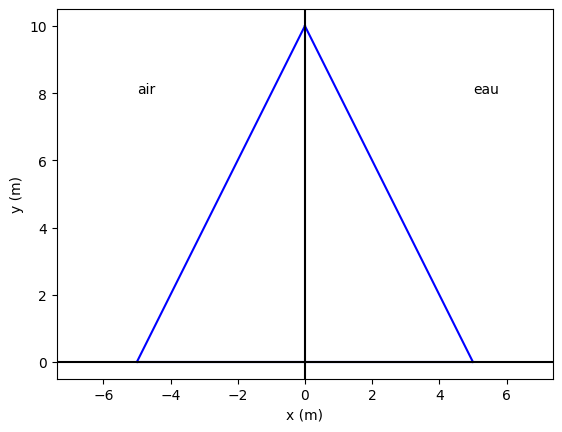

In [3]:
# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### __Calcul du poids exercée sur la digue__
Pour calculer le poids, nous devons connaître la surface de la digue, qui correspond exactement à l'aire sous la courbe de la fonction tracée dessus. Nous calculons cette aire $S$ avec la méthode des trapèzes. Nous obtiendrons ainsi le volume $V$ de la digue en multipliant cette surface par la longueur de la digue $L$=1 m, et nous en déduirons la masse de la digue $m=\rho_{béton}V$. Pour finir, nous obtiendrons le poids $P=mg$.

In [4]:
#définition des fonctions
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return xe * (1 - y / H)

In [5]:
def integration_trapeze(f, H, n):
    """
    Approxime l'intégrale de la fonction f sur l'intervalle [0, H]
    en utilisant la méthode des trapèzes avec n subdivisions.
    """
    dy = H / n
    integral = 0
    for i in range(n):
        y1 = i * dy
        y2 = (i + 1) * dy
        integral += (f(y1) + f(y2)) / 2 * dy
    return integral

In [6]:
integrale_air = integration_trapeze(fair, H, n)
integrale_eau = integration_trapeze(feau, H, n)

# surface et volume
surface_droite = np.abs(integrale_air) + np.abs(integrale_eau)
volume_droite = L * surface_droite

print(f"La surface de la digue vaut {surface_droite:.3f} m^2")
print(f"Le volume de la digue vaut {volume_droite:.3f} m^3")

La surface de la digue vaut 50.000 m^2
Le volume de la digue vaut 50.000 m^3


La surface est bien conforme à celle théorique attendue qui est $\frac{Base.Hauteur}{2}$ = 10x10/2 = 50 m$^2$.

In [7]:
#calcul du poids

rho_beton= 3000 #kg/m3
m = rho_beton*volume_droite #masse de la digue
g = 9.81 #intensité de la pesanteur
F_g=-m*g #poids selon y

print(f"La force de gravité exercée sur la digue vaut {F_g:.2e} N selon y.")

La force de gravité exercée sur la digue vaut -1.47e+06 N selon y.


#### __Calcul des forces de pression__
Puisque les forces de pression s'exercent perpendiculairement à la surface d'application, il faut trouver un vecteur normal à la tangente des deux fonctions en tout point, qui sera le vecteur directeur d'une des forces de pression locale.  
Ce vecteur normal est donné par $$
\vec n = -\sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$  

L'angle $\theta$ entre la tangente en un point et l'axe des abscisses est relié à la dérivée de la courbe par :
$$
tan(\theta) = f'(y)
$$
On pourrait trouver la valeur numérique de l'angle $\theta$, mais il ne nous est pas utile de le faire, nous allons voir pourquoi.

On a $$\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}$$
Comme $\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}$ et que $\vec n = -\sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} $, on peut réexprimer cette intégrale en termes simples.  
**Composante selon $e_x$ :**
$$
F_{px} = \int_0^H P(y) \frac{dy}{\cos(\theta)} (-\cos(\theta))
$$

$$
F_{px} = -\int_0^H P(y) dy = -\rho_{eau} g \int_0^H  (y-H) dy 
$$

**Composante selon $e_y$ :**
$$
F_{py} = \int_0^H P(y) \frac{dy}{\cos(\theta)} (-\sin(\theta))
$$

$$
F_{py} = -\tan(\theta) \int_0^H P(y) dy
$$

Comme $tan(\theta) = f'(y)$, on a $$F_{py} = \rho_{eau} g\frac{x_e}{H} \int_0^H (y-H) dy$$

Nous voyons que l'angle $\theta$ disparaît naturellement dans les deux composantes. Cela nous permet d'exprimer directement les forces sans avoir besoin de calculer $\theta$ explicitement.  
Calculons ces intégrales à l'aide de la méthode des trapèzes.

In [8]:
# Fonctions de pression
def pression_x(y):
    return -rho_eau * g * (y - H)

def pression_y(y):
    return rho_eau * g * (xe / H) * (y - H)

In [9]:
y = np.linspace(0, H, n)

F_px = -np.trapz(pression_x(y), y)  
F_py = np.trapz(pression_y(y), y)

# Affichage des résultats
print(f"Force F_px : {F_px:.3f} N")
print(f"Force F_py : {F_py:.3f} N")


Force F_px : -490500.000 N
Force F_py : -245250.000 N


#### __Condition d'équilibre translationnel__
Nous disposons à présent de tous les outils nécessaires pour calculer la réaction normale et la réaction tangentielle au sol.
$$
\sum F_x = T + F_{px} = 0 \Rightarrow T = -F_{px}
$$
$$
\sum F_y = N + P + F_{py} = 0 \Rightarrow N = -(P + F_{py})
$$


In [10]:
mu = 0.5 #coeff de frottement roche/béton

#composantes normale et tangentielle de la réaction
N = -(F_g + F_py)
T = -F_px

#vérif de l'équilibre translationnel
ratioTN = T / N

print(f"Réaction normale du sol : {N:.2e} N")
print(f"Réaction tangentielle du sol : {T:.2e} N")
print(f"Rapport T/N : {ratioTN:.3f}")

if T <= mu*N:
    print("La digue est en équilibre translationnel.")
else:
    print("Attention, la digue risque de glisser.")

Réaction normale du sol : 1.72e+06 N
Réaction tangentielle du sol : 4.90e+05 N
Rapport T/N : 0.286
La digue est en équilibre translationnel.


#### __Fonction `digue`__

Nous allons à présent reprendre tout ce que l'on a fait mais en imposant $x_a=-5$ et $x_e=0$ (digue côté eau enlevée) puis dans un second cas $x_a=0$ et $x_e=+5$ (digue côté air enlevée). Nous créons pour cela une fonction qui nous indiquera si la digue est en équilibre ou non, qui recompile tous les codes établis jusqu'à présent.

In [11]:
import numpy as np

def digue(xa, xe, g=9.81, H=10, rho_eau=1000, L=1, rho_beton=3000, n=1000, mu=0.5):
    """Calcule et affiche la stabilité de la digue."""

    # Discrétisation
    y = np.linspace(0, H, n)
    dy = H / n

    # Profils de la digue
    fair = lambda y: -(y - H) * xa / H
    feau = lambda y: xe * (1 - y / H)

    # Intégration par trapèzes
    integrale_air = np.trapz(fair(y), y)
    integrale_eau = np.trapz(feau(y), y)

    # Surface et volume
    surface_droite = np.abs(integrale_air) + np.abs(integrale_eau)
    volume_digue = L * surface_droite

    # Poids de la digue
    F_g = -rho_beton * volume_digue * g  

    # Pressions de l'eau
    pression_x = lambda y: -rho_eau * g * (y - H)
    pression_y = lambda y: rho_eau * g * (xe / H) * (y - H)

    # Forces de pression par trapèzes
    F_px = -np.trapz(pression_x(y), y)
    F_py = np.trapz(pression_y(y), y)

    # Réactions du sol
    N, T = -(F_g + F_py), -F_px
    ratio_TN = T / N

    #résultat
    print(f"Pour xa = {xa}, xe = {xe}:")
    print(f"Volume de la digue : {volume_digue:.3f} m^3")
    print(f"Force de gravité : {F_g:.2e} N selon y")
    print(f"Force de pression F_px : {F_px:.3f} N selon x")
    print(f"Force de pression F_py : {F_py:.3f} N selon y")
    print(f"Réaction normale du sol : {N:.2e} N")
    print(f"Réaction tangentielle du sol : {T:.2e} N")
    print(f"Rapport T/N exacte : {ratio_TN}")
    print(f"Rapport T/N : environ {ratio_TN:.3f}")
    if T <= mu*N:
        print("La digue est en équilibre translationnel.")
    else:
        print("Attention, la digue risque de glisser.")
    print("")

In [12]:
# test avec xa = -5 et xe = 0
digue(xa=-5, xe=0)

#test avec xa = 0 et xe = 5 
digue(xa=0, xe=5)

Pour xa = -5, xe = 0:
Volume de la digue : 25.000 m^3
Force de gravité : -7.36e+05 N selon y
Force de pression F_px : -490500.000 N selon x
Force de pression F_py : 0.000 N selon y
Réaction normale du sol : 7.36e+05 N
Réaction tangentielle du sol : 4.90e+05 N
Rapport T/N exacte : 0.6666666666666666
Rapport T/N : environ 0.667
Attention, la digue risque de glisser.

Pour xa = 0, xe = 5:
Volume de la digue : 25.000 m^3
Force de gravité : -7.36e+05 N selon y
Force de pression F_px : -490500.000 N selon x
Force de pression F_py : -245250.000 N selon y
Réaction normale du sol : 9.81e+05 N
Réaction tangentielle du sol : 4.90e+05 N
Rapport T/N exacte : 0.5
Rapport T/N : environ 0.500
La digue est en équilibre translationnel.



#### __Analyse du résultat__
Intéressons nous d'abord au cas où il n'y a pas de partie de digue côté eau ($x_a=-5$ et $x_e=0$).  
L'eau pousse sur une surface verticale. 
Il n'y a pas de composante verticale de pression exercée sur la digue (car la surface est juste verticale). La réaction normale N est réduite au poids seul, ce qui augmente le rapport T/N (car N est plus faible). Il n'y a pas assez de frottements. Ainsi, la digue risque de glisser.

Dans le cas où il n'y a pas de partie de digué côté air ($x_a=0$ et $x_e=+5$), l'eau pousse sur une surface inclinée. La pente côté eau redirige une partie de la pression de l'eau en une force verticale vers le bas.
Cette force $F_{py}$ s'ajoute au poids, augmentant la réaction normale N, et donc le frottement. La géométrie inclinée exploite la pression de l'eau pour auto-stabiliser la digue : c'est bien comme cela que les barrages sont construits en général.

### __3.1 Cas des digues convexes__
Nous allons à présent nous intéressons aux digues convexes.  
On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$  
Voici l'allure de la digue :

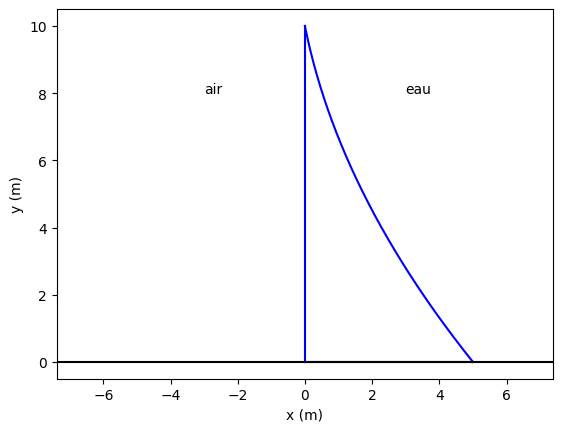

In [13]:
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### __Fonction `digue_convexe`__
À présent, nous allons étudier l'équilibre statique de cette digue de forme convexe. Pour le calcul du poids, le raisonnement reste le même. Egalement, le calcul des forces de pression reste le même sauf que cette fois ci la dérivée de la fonction `feau`change par rapport à la première partie.  
Pour un coefficient $a$=3, nous vérifions si l'équilibre translationnel est vérifié pour $x_a$=0 et $x_e$=5.

In [14]:
def digue_convexe(a=3, xa=0, xe=5,g=9.81, H=10, rho_eau=1000, rho_beton=3000, L=1, mu=0.5, n=1000):
    """ Fonction modifiée pour une interface convexe côté eau """
    #définition fonction convexe
    # Discrétisation
    y = np.linspace(0, H, n)

    # Définition des fonctions
    def feau(y):
        return a * (y/H)**2 - (a + xe) * (y/H) + xe  

    def f_prime_eau(y):
        return (2*a*y)/(H**2) - (a + xe)/H  

    def fair(y):
        return -(y - H) * xa / H  

    def pression_x(y):
        return rho_eau * g * (H - y)  

    def pression_y(y):
        return pression_x(y) * f_prime_eau(y)  

    def integrale_trapeze(f):
        return np.trapz(f(y), y)

    # Calcul du volume de la digue
    volume_digue = L * np.abs(integrale_trapeze(feau))
    F_g = -rho_beton * volume_digue * g 
    
    #méthode trapèze
    F_px = -integrale_trapeze(pression_x)
    F_py = integrale_trapeze(pression_y)

    #composantes normale et tangentielle de la réaction du sol
    N = -(F_g + F_py)
    T = -F_px

    #calcul du rapport T/N
    ratio_TN = T / N

    #résultat
    print(f"Pour a={a}, xa = {xa}, xe = {xe}:")
    print(f"Volume de la digue : {volume_digue:.3f} m^3")
    print(f"Force de gravité : {F_g:.2e} N selon y")
    print(f"Force de pression F_px : {F_px:.3f} N selon x")
    print(f"Force de pression F_py : {F_py:.3f} N selon y")
    print(f"Réaction normale du sol : {N:.2e} N")
    print(f"Réaction tangentielle du sol : {T:.2e} N")
    print(f"Rapport T/N exacte : {ratio_TN}")
    print(f"Rapport T/N : environ {ratio_TN:.3f}")
    if T <= mu*N:
        print("La digue est en équilibre translationnel.")
    else:
        print("Attention, la digue risque de glisser.")
    print("")

In [15]:
# Test avec a=3, xa=0, xe=5
digue_convexe(a=3, xa=0, xe=5)

Pour a=3, xa = 0, xe = 5:
Volume de la digue : 20.000 m^3
Force de gravité : -5.89e+05 N selon y
Force de pression F_px : -490500.000 N selon x
Force de pression F_py : -294300.098 N selon y
Réaction normale du sol : 8.83e+05 N
Réaction tangentielle du sol : 4.90e+05 N
Rapport T/N exacte : 0.5555554009255054
Rapport T/N : environ 0.556
Attention, la digue risque de glisser.



La digue n'est donc pas en équilibre translationnel pour ce cas. Si nous changeons $x_e$ à 6m, on a :

In [16]:
# Test avec a=3, xa=0, xe=6
digue_convexe(a=3, xa=0, xe=6)

Pour a=3, xa = 0, xe = 6:
Volume de la digue : 25.000 m^3
Force de gravité : -7.36e+05 N selon y
Force de pression F_px : -490500.000 N selon x
Force de pression F_py : -343350.098 N selon y
Réaction normale du sol : 1.08e+06 N
Réaction tangentielle du sol : 4.90e+05 N
Rapport T/N exacte : 0.454545351032771
Rapport T/N : environ 0.455
La digue est en équilibre translationnel.



Cette pente est plus favorable par rapport à la pente affine avec $x_a=0$ et $x_e=5$, bien que la digue ait le même volume. Cela montre que la stabilité n'est pas seulement une question de poids, mais aussi de forme.

On reprend le même format que la fonction précédemment établie sauf que cette fois $x_e$ n'est pas fixé et nous retournons la valeur du volume et de T/N.

In [17]:
def volume_ratio(xe, a=3, H=10, rho_eau=1000, rho_beton=3000, g=9.81, L=1, n=1000):
    """Calcule le volume et le rapport T/N pour une digue convexe."""

    # Discrétisation
    y = np.linspace(0, H, n)

    # Définition des fonctions
    def feau(y):
        return a * (y/H)**2 - (a + xe) * (y/H) + xe  
    
    def f_prime_eau(y):
        return (2*a*y)/(H**2) - (a + xe)/H  

    def pression_x(y):
        return rho_eau * g * (H - y)  

    def pression_y(y):
        return pression_x(y) * f_prime_eau(y)  

    def integrale_trapeze(f):
        return np.trapz(f(y), y)

    # Calcul du volume de la digue
    volume_digue = L * np.abs(integrale_trapeze(feau))
    F_g = -rho_beton * volume_digue * g  

    # Calcul des forces de pression
    F_px = -integrale_trapeze(pression_x)
    F_py = integrale_trapeze(pression_y)

    # Réactions du sol
    N = -(F_g + F_py)
    T = -F_px
    ratio_TN = T / N

    return volume_digue, ratio_TN


On trace ainsi $T/N$ en fonction du volume. Nous pourrons ainsi en déduire quel est le volume minimal nécéssaire pour garder le rapport $T/N$ inférieur ou égal à 0.5 et donc que la condition d'équilibre de la digue soit vérifiée.

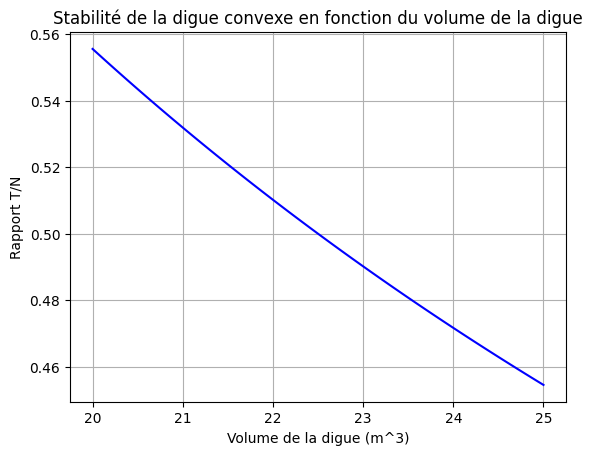

In [18]:
#boucle sur les xe
volumes=[]
ratios_TN=[]
xe_valeurs=np.linspace(5,6,100)
for xe in xe_valeurs :
    volume,ratio = volume_ratio(xe)
    volumes.append(volume)
    ratios_TN.append(ratio)

#tracé du graphique
plt.plot(volumes,ratios_TN, "b")
plt.xlabel("Volume de la digue (m^3)")
plt.ylabel("Rapport T/N")
plt.title("Stabilité de la digue convexe en fonction du volume de la digue")
plt.grid()
plt.show()

Par lecture graphique, nous voyons donc que le rapport $T/N$ est inférieur ou égal à 0.5 à partir d'un volume de digue de 22.5 m$^3$.

#### __Analyse des résultats__
Nous allons analyser les résultats donnés par la digue convexe et également comparer en quoi ce type de digue est meilleure que les digues en pentes droites. 


Avec une __digue convexe__, __la pression est mieux répartie__ car la surface de contact change progressivement avec la hauteur.  
Avec ce type de digue, la force $F_{px}$ (horizontale) est moins forte comparée à une digue droite (elle change en fonction d'où elle est appliquée sur la forme).  
La force $F_py$ (verticale) en revanche est plus forte, ce qui __augmente la pression du sol__ sur la base de la digue. Cela permet de mieux maintenir la digue au sol. C'est ce qui explique pourquoi nous avons moins besoin de béton pour stabiliser la digue convexe.

Pour qu’une digue droite soit stable, il faut qu’elle soit plus lourde (donc plus de béton).  
Avec une __digue convexe__, __la pression de l’eau aide naturellement à la stabiliser__, ce qui signifie qu’on n’a pas besoin d’autant de béton pour éviter qu’elle ne glisse.  

__Avec une forme convexe, on peut stabiliser la digue avec seulement 22.5 m$^3$ de béton, alors qu’une forme droite en nécessiterait plus.  
En clair, les digues convexes sont beaucoup plus utile (et économique) que les digues en pentes droites.__

## __Discussion et Conclusion__

Cette étude a permis de modéliser numériquement les forces exercées sur une digue et d'évaluer sa stabilité translationnelle. Nous avons analysé deux cas principaux : les digues en pentes droites et les digues convexes.

Pour une digue en pentes droites, nous avons observé que la configuration où la pente est du côté de l'eau permet une meilleure stabilisation que lorsque la digue est verticale du côté de l'eau. 

Dans le cas des digues convexes, la stabilisation se fait grâce à une meilleure répartition des forces de pression de l'eau. La force horizontale est réduite tandis que la force verticale est augmentée, ce qui améliore la réaction normale du sol et limite le risque de glissement. Nous avons déterminé que pour un coefficient de frottement $\mu$=0.5, un volume de 22.5 m$^3$ est suffisant pour assurer l'équilibre translationnel, alors qu'une digue droite demanderait un volume de béton plus important.

Notre modélisation a tout de même des limites : l'eau ne pourrait pas forcément être statique (en cas de fort courant par exemple), la modélisation 2D ne prend pas en compte les effets tridimensionnels,  la densité du béton pourrait varier dans certains cas... Nous aurions pu ajouter une dimension supplémentaire pour affiner le modèle.
Egalement, l'extension de l'étude à l'équilibre rotationnel permettrait d'obtenir d'autres conditions sur la stabilité, ce qui n'a pas été fais ici.

Pour conclure, notre modélisation met en évidence l'importance de la forme d'une digue afin qu'elle soit stable pour pouvoir retenir de l'eau.